# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,285.549438,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,285.625427,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,279.167206,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,271.398376,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,265.851837,349.899994,359.250000,348.250000,358.000000,6048178


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

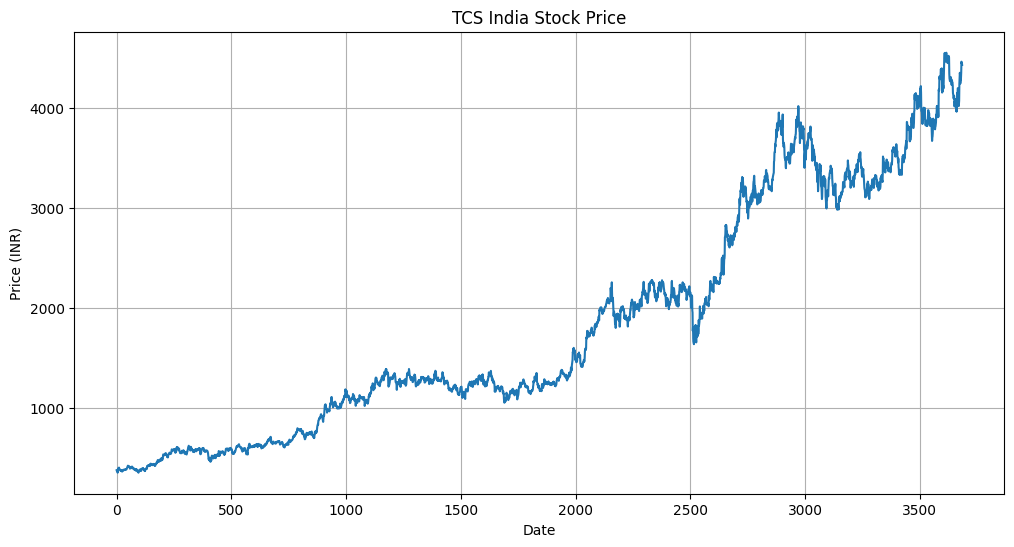

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3681,4354.399902,4386.950195,4289.049805,4313.549805,3302642
3682,4464.049805,4489.000000,4360.000000,4400.799805,3746747
3683,4445.500000,4465.000000,4412.750000,4453.000000,1842087


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3681,4270.492998
3682,4275.896497
3683,4278.511995
3684,4281.341492


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

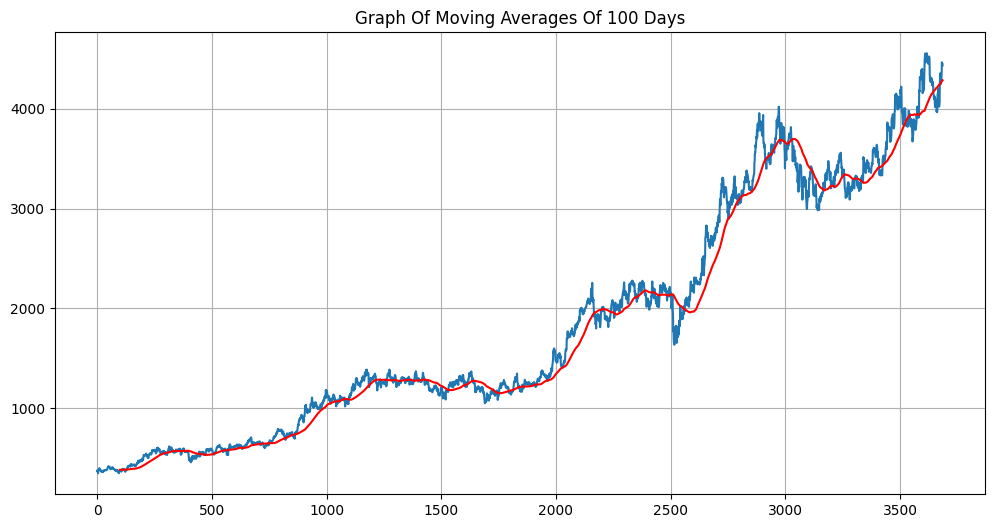

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3681,4104.599747
3682,4106.316495
3683,4107.796495
3684,4109.556744


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

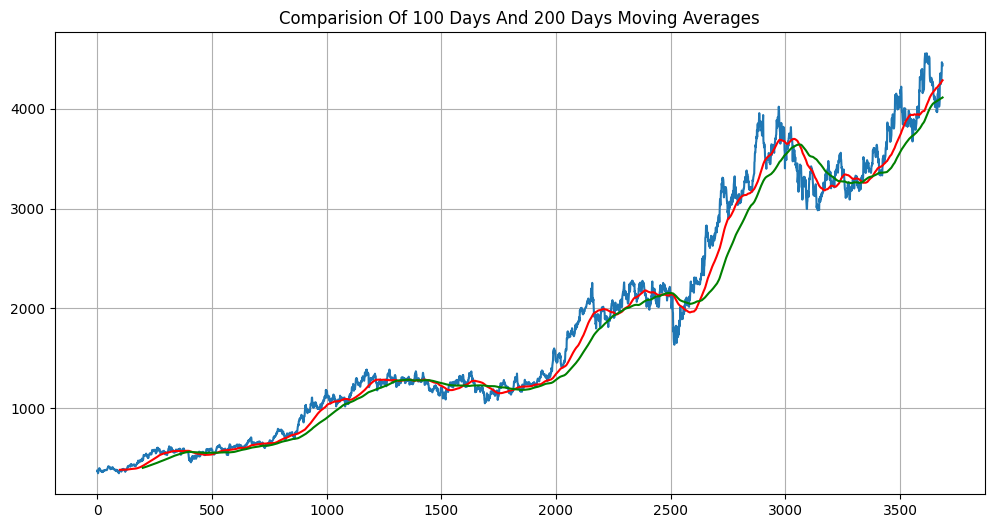

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3686, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2580, 7)
(1106, 7)


In [13]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,285.549438,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,285.625427,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,279.167206,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,271.398376,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,265.851837,349.899994,359.250000,348.250000,358.000000,6048178


In [14]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2580,2020-06-25,1864.792603,2016.099976,2060.000000,2009.250000,2035.000000,3043931
2581,2020-06-26,1959.831177,2118.850098,2132.000000,2019.949951,2025.000000,6300722
2582,2020-06-29,1943.921753,2101.649902,2127.600098,2091.300049,2108.000000,3076341
2583,2020-06-30,1925.885620,2082.149902,2111.899902,2075.050049,2100.000000,3071725
2584,2020-07-01,1935.042603,2092.050049,2113.949951,2079.500000,2079.699951,2503466


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.87860127],
       [0.8738061 ],
       [0.8851258 ]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2480, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 333ms/step - loss: 0.0812 - mean_absolute_error: 0.1994
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - loss: 0.0098 - mean_absolute_error: 0.0686
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 42s 324ms/step - loss: 0.0109 - mean_absolute_error: 0.0732
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - loss: 0.0074 - mean_absolute_error: 0.0612
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 321ms/step - loss: 0.0070 - mean_absolute_error: 0.0592
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.0061 - mean_absolute_error: 0.0532
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 322ms/step - loss: 0.0058 - mean_absolute_error: 0.0538
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - loss: 0.0056 - mean_absolute_error: 0.0515
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - loss: 0.0052 - mean_absolute_error: 0.0507
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - loss: 0.0050 - mean_absolute_error: 0.0481
Epoch 11/

In [46]:
model.save('keras_model.h5')

In [47]:
test_close.shape

(1106, 1)

In [48]:
past_100_days = pd.DataFrame(train_close[-100:])

In [50]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [51]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [52]:
final_df.head()

,0
0,2165.000000
1,2152.000000
2,2150.000000
3,2125.000000
4,2071.600098


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.21921521],
       [0.21489045],
       [0.21422511],
       ...,
       [0.96698215],
       [0.96791357],
       [0.96676595]])

In [54]:
input_data.shape

(1206, 1)

# Testing the model

---



In [55]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1106, 100, 1)
(1106,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [57]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step


In [58]:
y_pred.shape

(1106, 1)

In [59]:
y_test

array([0.16740131, 0.1709609 , 0.19469719, ..., 0.96698215, 0.96791357,
       0.96676595])

In [60]:
y_pred

array([[0.23299214],
       [0.23253146],
       [0.23209979],
       ...,
       [0.88225293],
       [0.89062554],
       [0.8998344 ]], dtype=float32)

In [61]:
scaler.scale_

array([0.00033267])

In [62]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

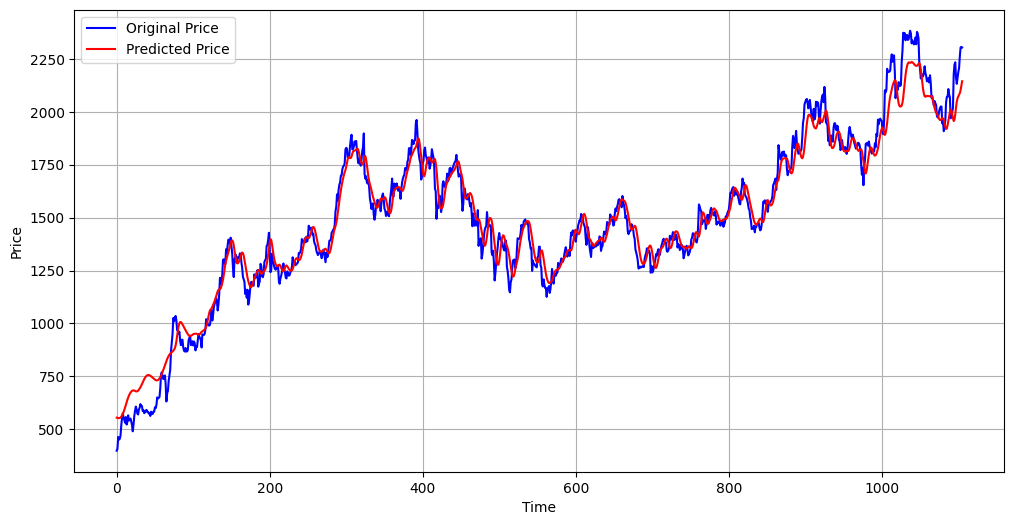

In [63]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [64]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 3.70%


Calculation of R2 score

In [65]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9655516312905843


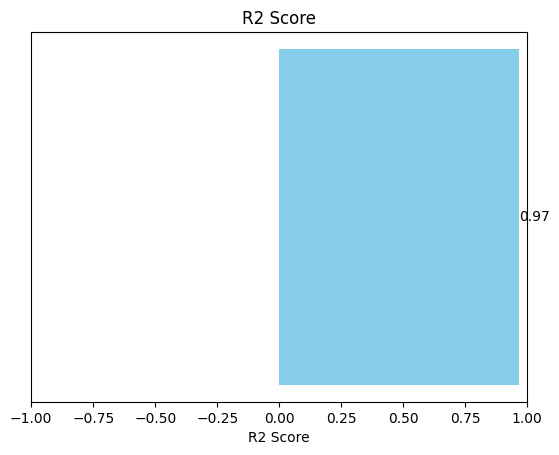

In [66]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

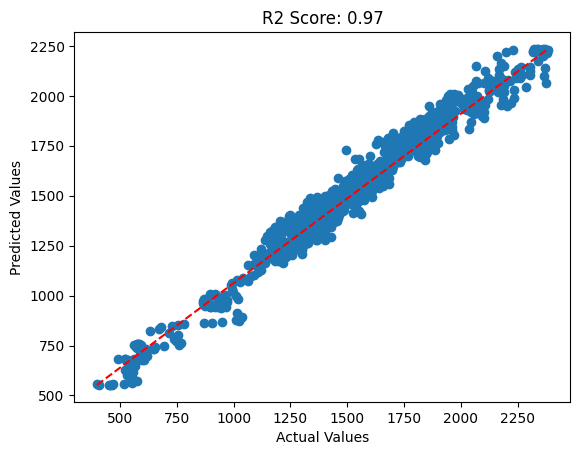

In [67]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

Value at Risk (95% confidence): $0.00
Final portfolio value: $11297784.04 from an initial investment of $100000


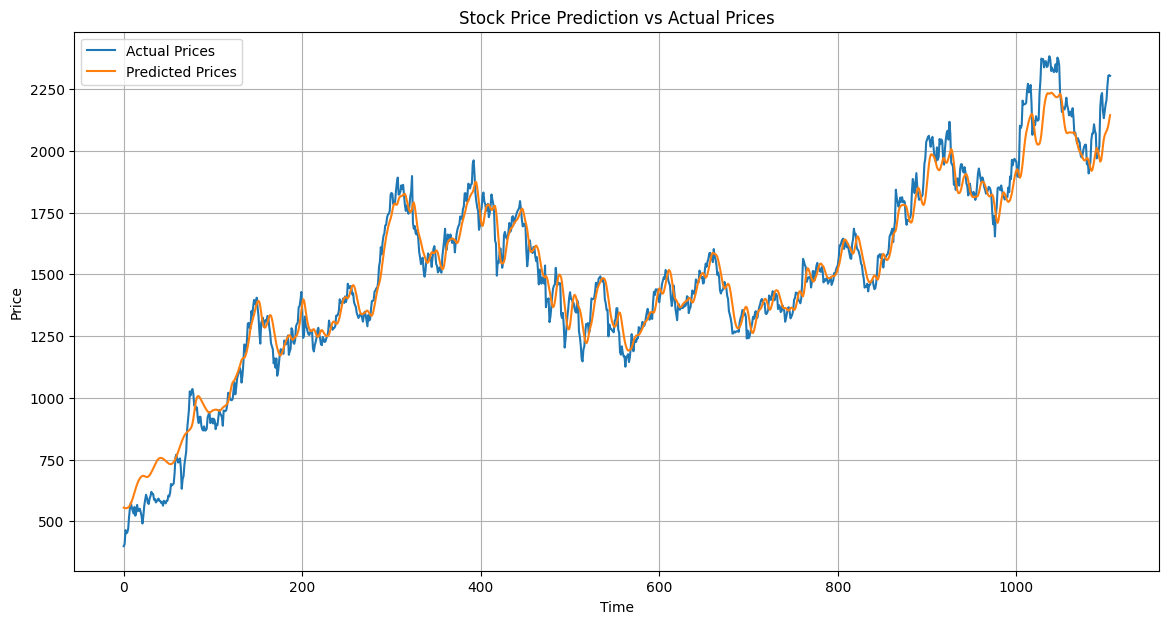

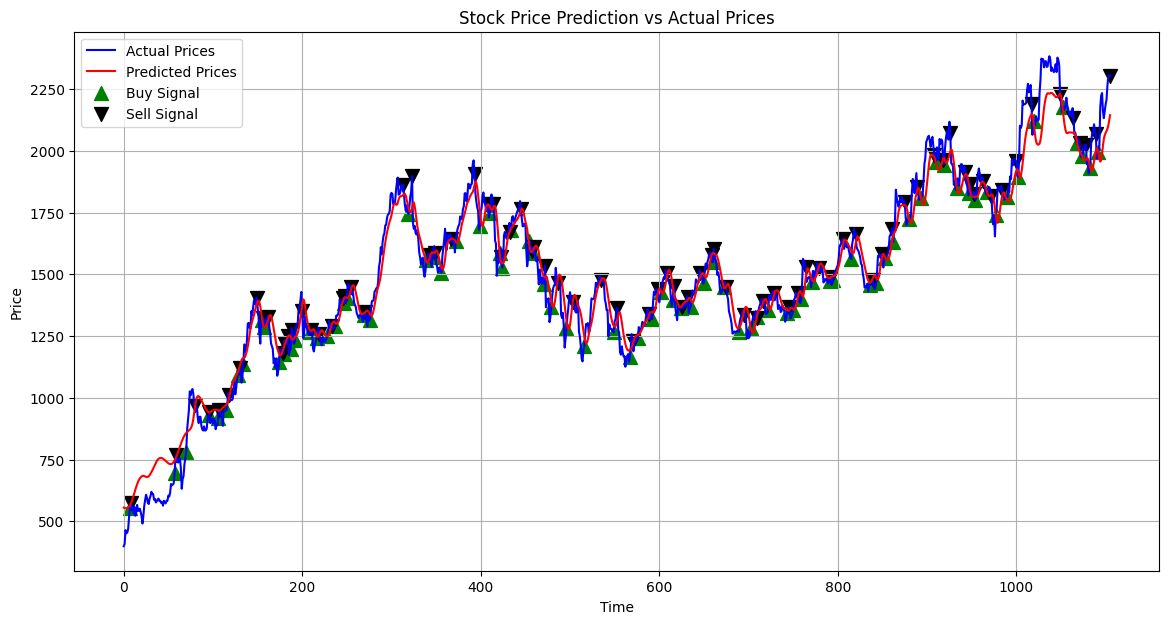

Final portfolio value: $11297784.04 from an initial investment of $100000


In [68]:
import numpy as np

def calculate_var(position, historical_returns, confidence_level=0.95):
    """
    Calculate the Value at Risk (VaR) for a given position using historical data.

    Parameters:
        position (float): Total value of the position
        historical_returns (numpy.array): Array of historical percentage returns
        confidence_level (float): Confidence level for VaR calculation

    Returns:
        float: The Value at Risk at the specified confidence level
    """
    if len(historical_returns) == 0:
        return 0
    # Calculate the percentile
    var = np.percentile(historical_returns, (1 - confidence_level) * 100)
    # Calculate VaR
    return position * (-var)

# Example usage:
# Assuming 'df' is your DataFrame with close prices
df['returns'] = df['Close'].pct_change()
historical_returns = df['returns'].dropna().values
position = 100000  # Position size in your portfolio currency
var = calculate_var(position, historical_returns)
print(f"Value at Risk (95% confidence): ${var:.2f}")




def backtest_strategy(predictions, actuals, initial_investment=100000):
    """
    Simple backtesting strategy that buys when the predicted next day's price is higher than the current price.

    Parameters:
        predictions (numpy.array): Predicted future prices
        actuals (numpy.array): Actual future prices
        initial_investment (float): Starting capital

    Returns:
        float: The final portfolio value
    """
    cash = initial_investment
    holding = 0
    for pred_today, actual_today, actual_tomorrow in zip(predictions[:-1], actuals[:-1], actuals[1:]):
        if pred_today < actual_tomorrow and cash >= actual_today:  # Buy if prediction is price will go up
            shares_to_buy = cash // actual_today
            cash -= shares_to_buy * actual_today
            holding += shares_to_buy
        elif pred_today > actual_tomorrow and holding > 0:  # Sell if prediction is price will go down
            cash += holding * actual_today
            holding = 0

    # Final sell-off at the last available price
    final_price = actuals[-1]
    cash += holding * final_price
    return cash

# Example usage:
final_portfolio_value = backtest_strategy(y_pred.flatten(), y_test)
print(f"Final portfolio value: ${final_portfolio_value:.2f} from an initial investment of $100000")



import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Stock Price Prediction vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

def plot_backtesting_results(predictions, actuals, title='Stock Price Prediction vs Actual Prices'):
    """
    Plots the results of the backtesting strategy along with the actual and predicted prices.

    Parameters:
        predictions (numpy.array): Predicted future prices
        actuals (numpy.array): Actual future prices
        title (str): Title of the plot
    """
    initial_investment = 100000
    cash = initial_investment
    holding = 0
    buy_signals = []
    sell_signals = []

    for i in range(len(predictions) - 1):
        pred_today = predictions[i]
        actual_today = actuals[i]
        actual_tomorrow = actuals[i + 1]

        if pred_today < actual_tomorrow and cash >= actual_today:
            shares_to_buy = cash // actual_today
            cash -= shares_to_buy * actual_today
            holding += shares_to_buy
            buy_signals.append(i)
        elif pred_today > actual_tomorrow and holding > 0:
            cash += holding * actual_today
            holding = 0
            sell_signals.append(i)

    # Final sell-off at the last available price
    if holding > 0:
        final_price = actuals[-1]
        cash += holding * final_price
        holding = 0
        sell_signals.append(len(actuals) - 1)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(actuals, label='Actual Prices', color='blue')
    plt.plot(predictions, label='Predicted Prices', color='red')
    plt.scatter(buy_signals, actuals[buy_signals], marker='^', color='green', label='Buy Signal', s=100)
    plt.scatter(sell_signals, actuals[sell_signals], marker='v', color='black', label='Sell Signal', s=100)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return cash

# Assuming 'y_pred' and 'y_test' are your predictions and actual prices respectively
final_cash = plot_backtesting_results(y_pred.flatten(), y_test)
print(f"Final portfolio value: ${final_cash:.2f} from an initial investment of $100000")

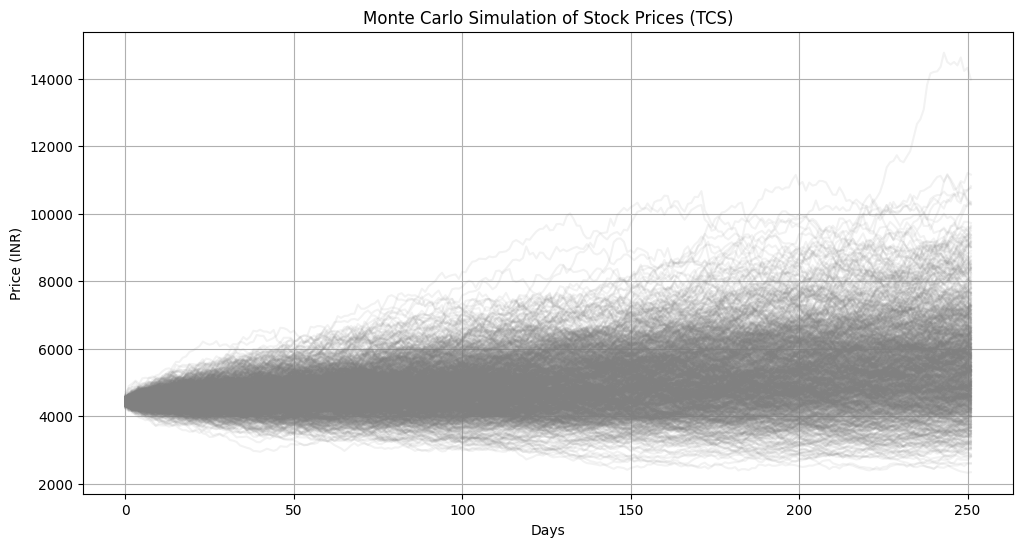

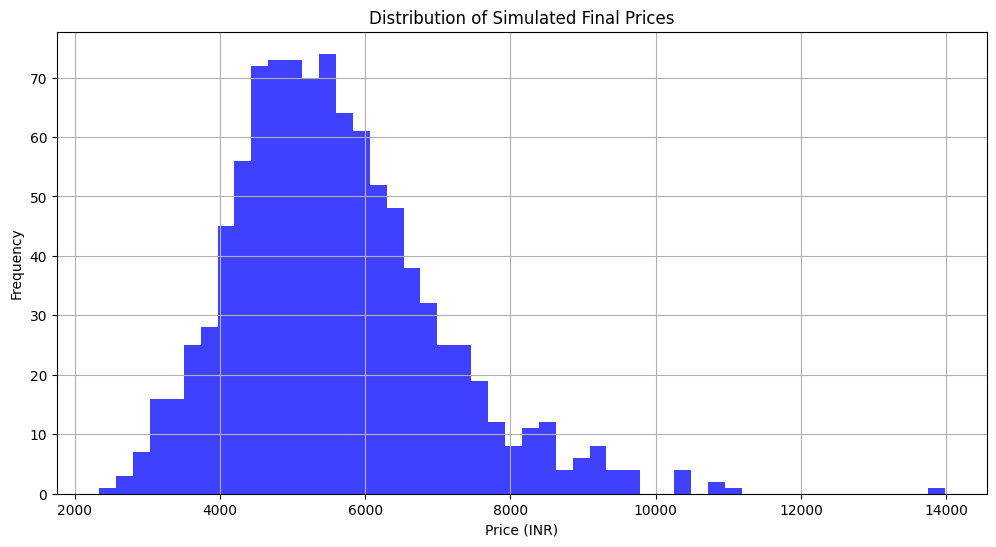

Expected Price after 252 days: ₹5588.45
Value at Risk (5% worst-case scenario): ₹3557.71


In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Parameters
num_simulations = 1000  # Number of simulations
num_days = 252  # Number of days to simulate (1 year of trading days)


simulation_df = data.copy()  # Create a copy of the 'data' DataFrame, which should contain your original data

# Calculate returns and drop NaNs on the copy
simulation_df['returns'] = simulation_df['Close'].pct_change()
simulation_df.dropna(inplace=True)  # Drop rows with NaN values

# Get the last closing price from the copied DataFrame
last_price = simulation_df['Close'].iloc[-1]  # Starting price
mean_return = simulation_df['returns'].mean()  # Mean daily return
volatility = simulation_df['returns'].std()  # Daily volatility

# Array to hold simulations
simulations = np.zeros((num_simulations, num_days))

# Run simulations
for i in range(num_simulations):
    prices = [last_price]  # Start with the last actual price as the initial price
    for _ in range(num_days):
        # Generate a random daily return
        daily_return = np.random.normal(mean_return, volatility)
        # Calculate the next price
        next_price = prices[-1] * np.exp(daily_return)
        prices.append(next_price)
    # Assign the simulated prices to the simulations array (excluding the initial price)
    # The change is here: use .flatten() or [:, 0] to make it 1-dimensional
    simulations[i, :] = np.array(prices[1:]).flatten()

# Plotting the simulations
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(simulations[i, :], color='gray', alpha=0.1)
plt.title("Monte Carlo Simulation of Stock Prices (TCS)")
plt.xlabel("Days")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

# Calculate final prices and visualize distribution
final_prices = simulations[:, -1]
plt.figure(figsize=(12, 6))
plt.hist(final_prices, bins=50, alpha=0.75, color='blue')
plt.title("Distribution of Simulated Final Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Calculate the expected price (mean of final prices)
expected_price = np.mean(final_prices)

# Print the Expected Price
print(f"Expected Price after {num_days} days: ₹{expected_price:.2f}")

# Calculate VaR based on the simulations
confidence_level = 0.95
var = np.percentile(final_prices, (1 - confidence_level) * 100)
print(f"Value at Risk (5% worst-case scenario): ₹{var:.2f}")
